In [1]:
# Rose wine sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_1=pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\Rose.csv')
df_1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [3]:
df_2 = pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\Rose.csv',parse_dates=True,squeeze=True,index_col=0)

In [4]:
print(df_2.head())
print('\n')
print(df_2.tail())

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64


YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64


In [5]:
date=pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_1.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [7]:
df = df_1.set_index('Time_Stamp',)
df.drop('YearMonth',axis=1,inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [8]:
# Plotting the time series for 'Rose' wine sales

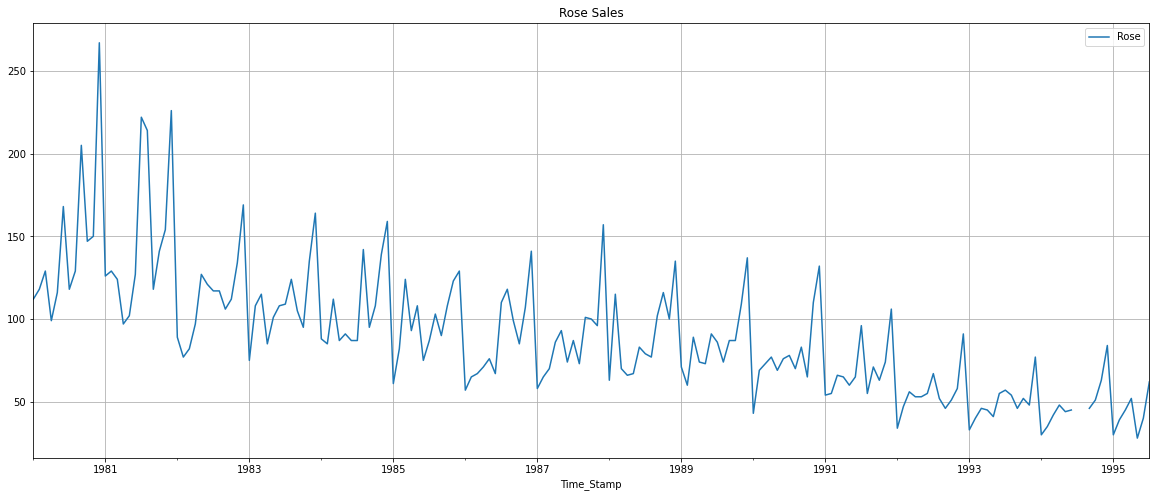

In [9]:
df.plot(figsize=(20,8))
plt.grid()
plt.title("Rose Sales")
plt.show()

# Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [10]:
# Checking null values for 'Rose' wine sales
df.isnull().sum()

Rose    2
dtype: int64

In [11]:
df=df.interpolate(method='linear',limit_direction='forward')

In [12]:
df.isnull().sum()


Rose    0
dtype: int64

In [13]:
# Descriptive Analysis of 'Sparkling' Wine Sales
df.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [14]:
# Plotting Boxplot for year wise
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

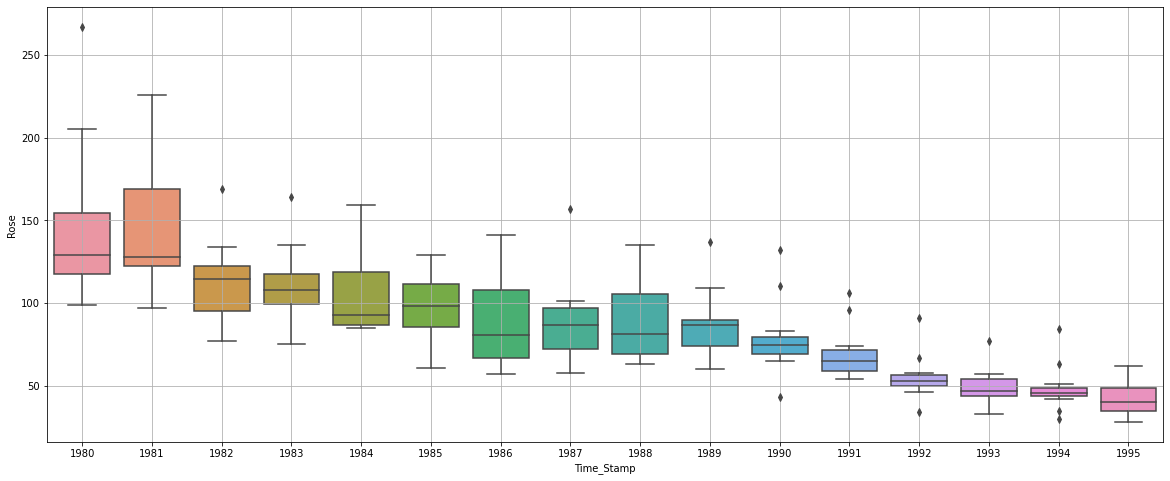

In [15]:
sns.boxplot(x=df.index.year,y=df['Rose'])
plt.grid();

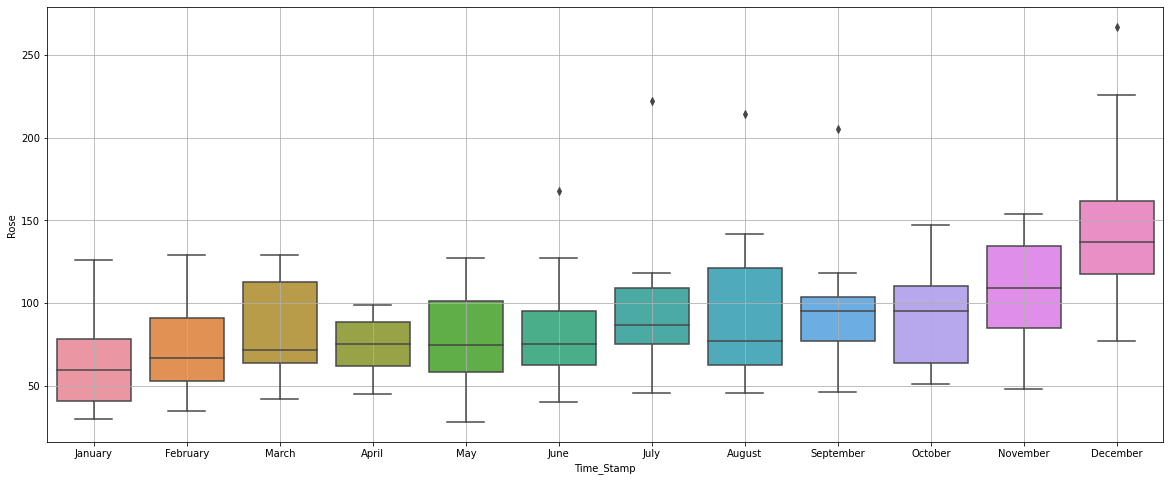

In [16]:
# Plotting Boxplot for Month wise

sns.boxplot(x=df.index.month_name(),y=df['Rose'])
plt.grid();


In [17]:
# Plotting the Rose wine year month wise sales - Line plot

In [18]:
monthly_sales_across_years=pd.pivot_table(df,values='Rose',columns=df.index.month_name(),index=df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


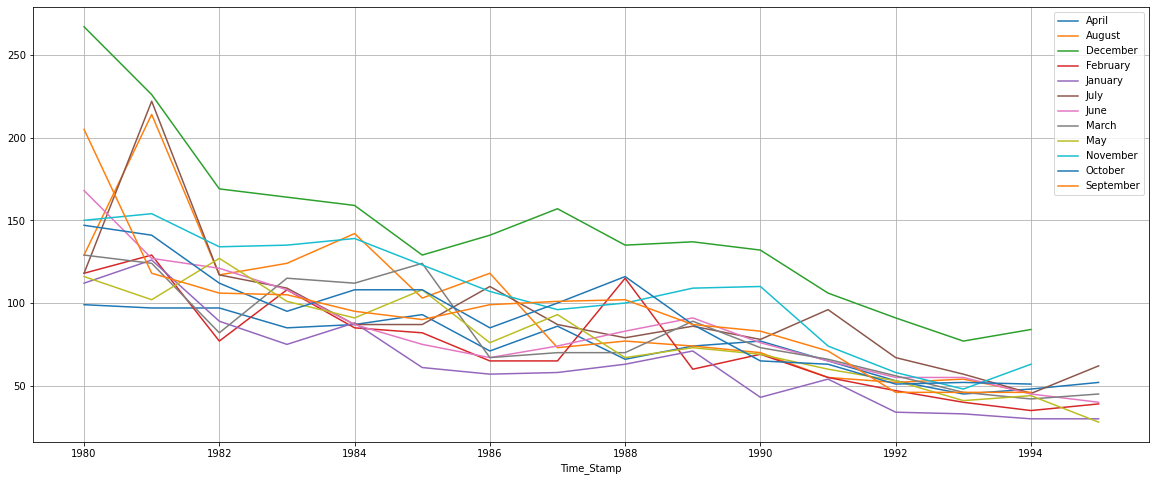

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [20]:
# Plotting a month plot to check the sales in different years and withing different month across

In [21]:
## importing the month plot from statsmodels
from statsmodels.graphics.tsaplots import month_plot

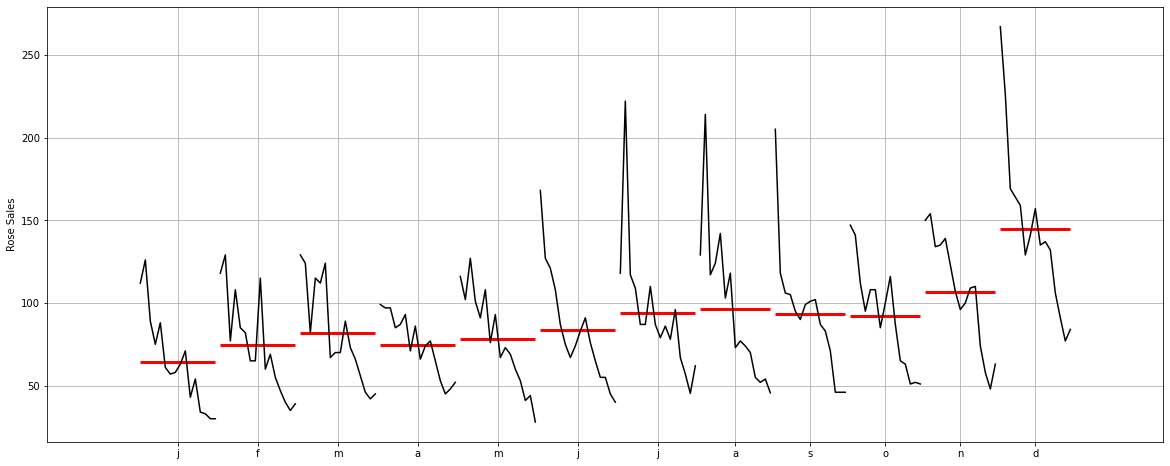

In [22]:
month_plot(df['Rose'],ylabel='Rose Sales')
plt.grid();

In [23]:
# Plot the Empirical Cumulative Distribution

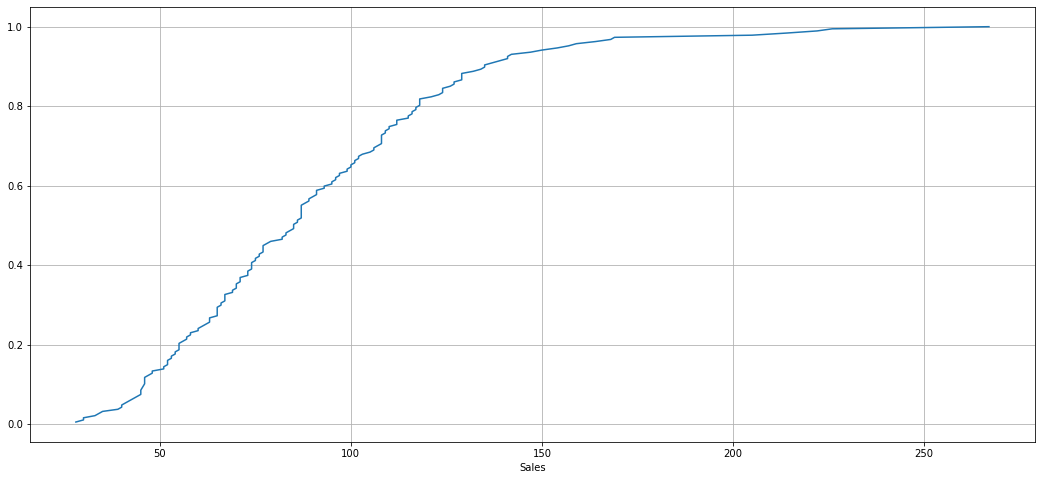

In [24]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [25]:
# Plot the average Rose Wine Sales per month and the month on month percentage change of Rose Wine Sales

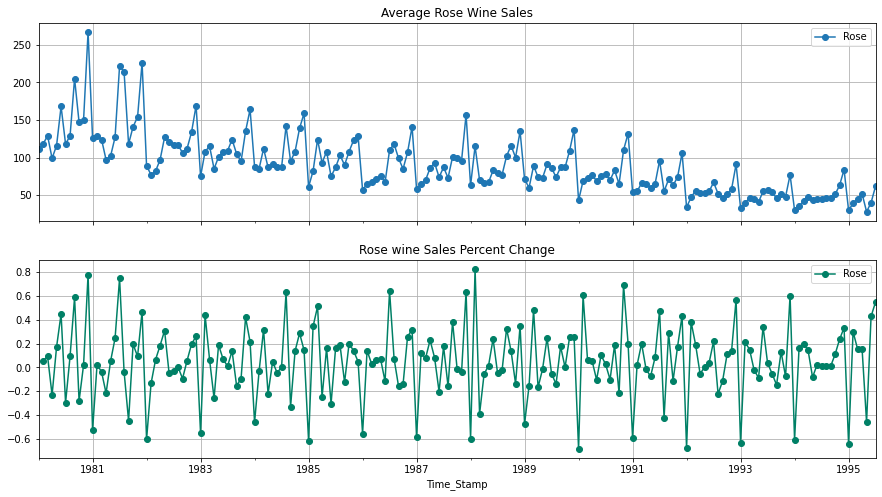

In [26]:
# group by date and get average Rose wine Sales, and precent change
average = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average Rose wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rpse Wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose wine Sales Percent Change",grid=True)

In [27]:
# Decomposing the time series into Additive decomposition and plot

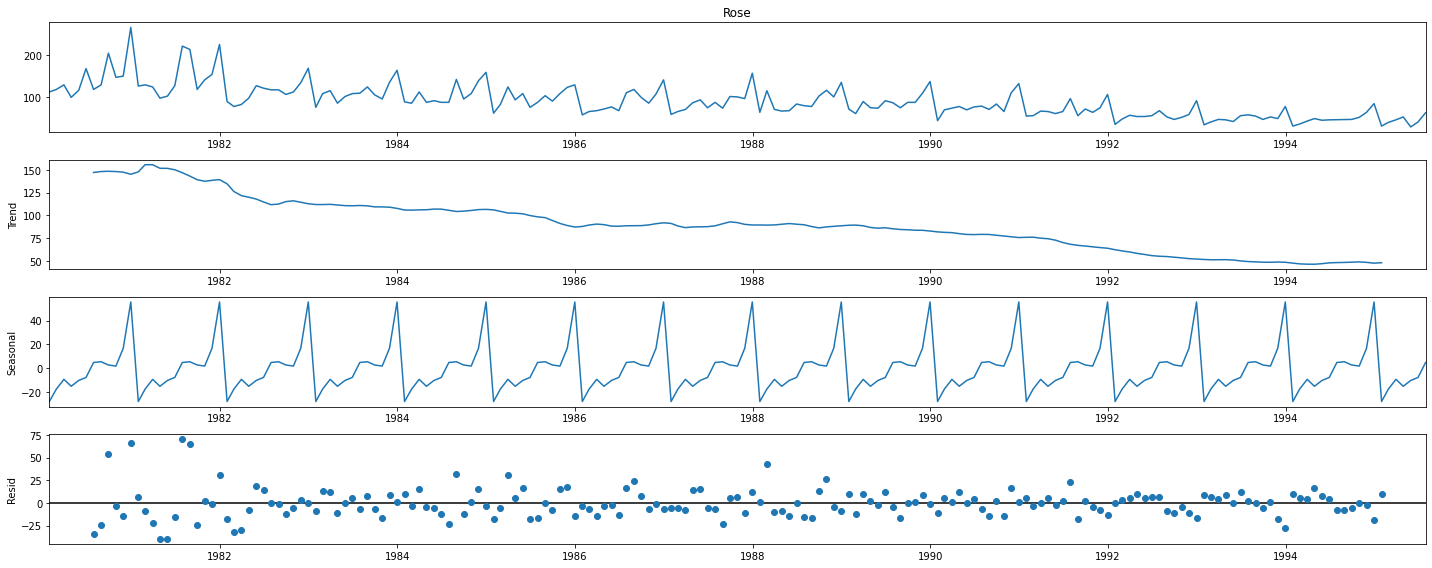

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Rose'],model='Additive')
decomposition.plot();

In [29]:
trend= decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [30]:
#Decomposing the time series into Additive decomosition and plot

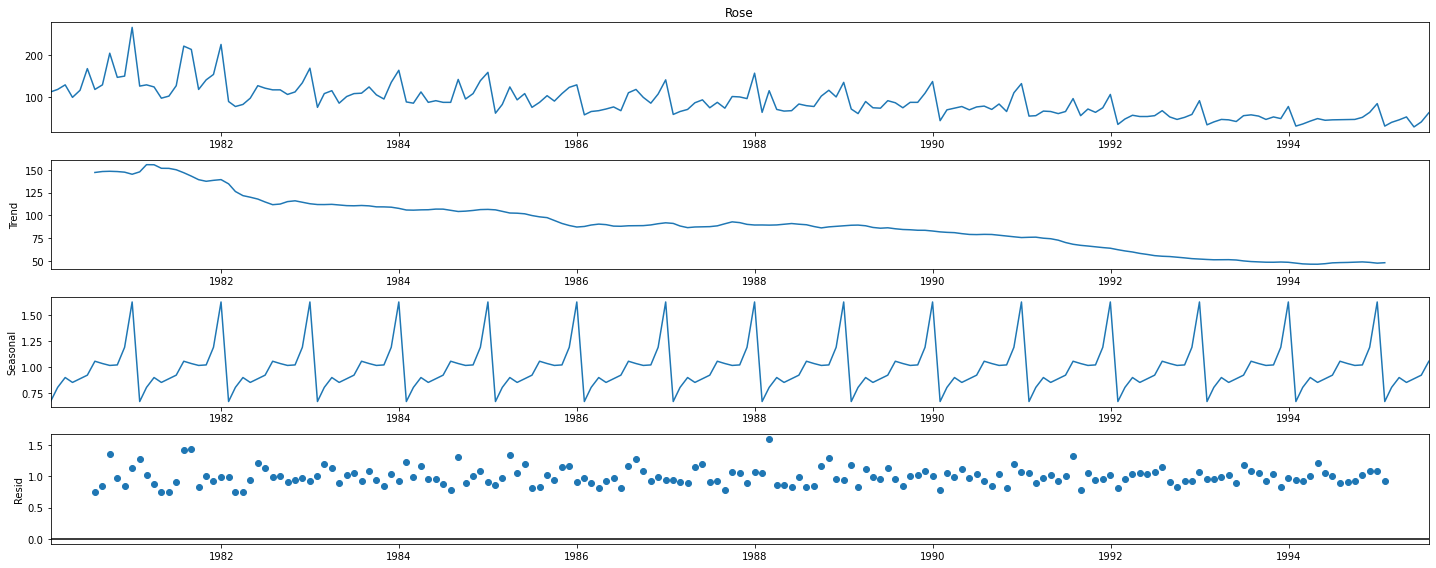

In [31]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [32]:
trend= decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

# Q3.Split the data into training and test. The test data should start in 1991.


In [33]:
# Splitting the data into train and test data

In [34]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [35]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [37]:
# Checking the shape of the train and test data
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


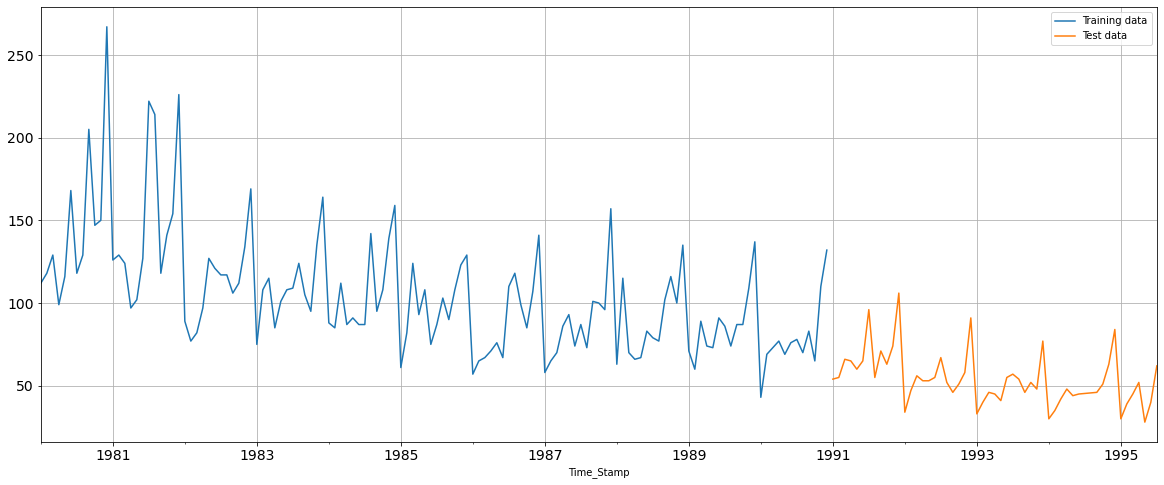

In [38]:
# plotting the graph for train and test set

train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training data','Test data'])
plt.show()

# Q4). Build various exponential smoothing models on the training data and evaluate the model usingRMSE on the test data. Other models such as regression,naïve forecast models and simple averagemodels. should also be built on the training data and check the performance on the test data using RMSE

In [39]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

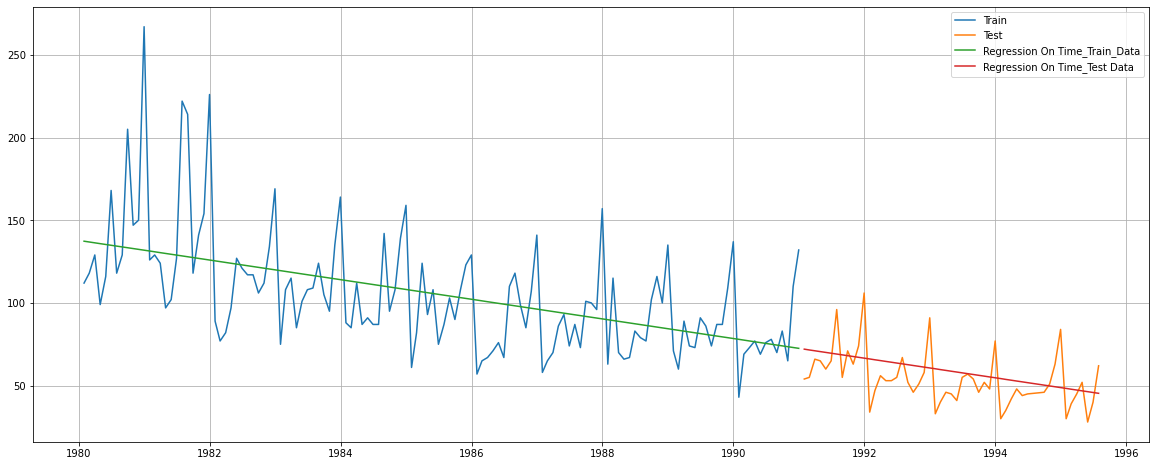

In [45]:
# Plotting Linear Regression Forecast
train_predictions_model1= lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']=test_predictions_model1
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'],label='Regression On Time_Train_Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [46]:
# Model 1 Evaluation:

In [47]:
### Defining Accuacy Matrix]
from sklearn import metrics
from math import sqrt

In [48]:
# Train - RMSE score

In [49]:
rmse_model1_train = sqrt(metrics.mean_squared_error(train['Rose'],train_predictions_model1))
print("For RegressionOnTime forecast on the Train Data, RMSE is %3.3f" %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data, RMSE is 30.718


In [50]:
# Test - RMSE score

In [51]:
rmse_model1_test = sqrt(metrics.mean_squared_error(test['Rose'],test_predictions_model1))
print("For RegressionOnTime forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data, RMSE is 15.269


In [52]:
# Creating Dataframe

In [53]:
result_DF=pd.DataFrame({'Train_RMSE':[rmse_model1_train],'Test_RMSE':[rmse_model1_test]},index=['RegressionOnTime'])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955


In [54]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [55]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [56]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

In [57]:
# Plotting Naive Forecast

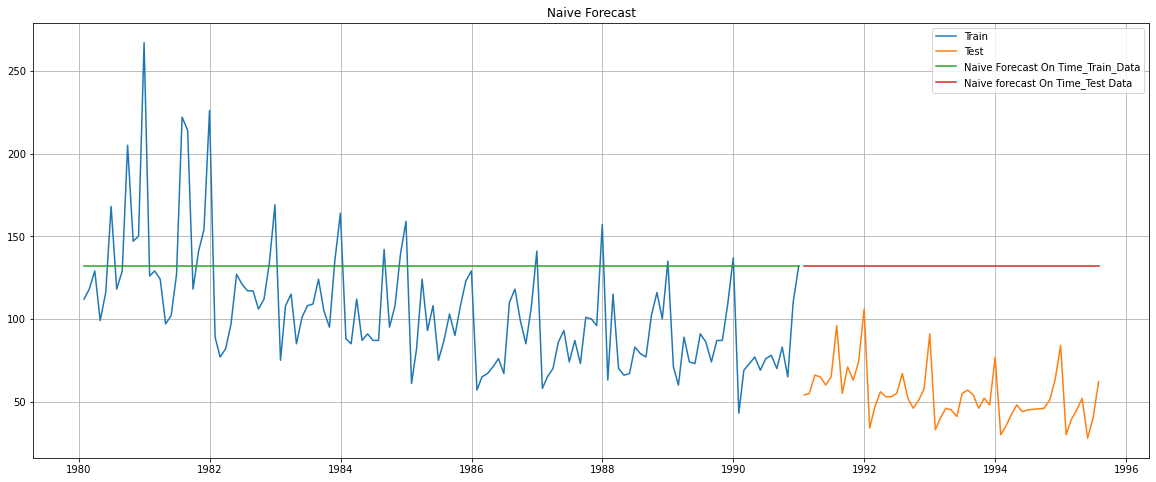

In [58]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'],label='Naive Forecast On Time_Train_Data')
plt.plot(NaiveModel_test['naive'], label='Naive forecast On Time_Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid();

In [59]:
# Model 2 Evaluation

In [60]:
# Train - RMSE score
rmse_model2_train = sqrt(metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive']))
print("For Naive Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model2_train))

For Naive Model forecast on the Train Data, RMSE is 45.064


In [61]:
# Test-RMSE score
rmse_model2_test = sqrt(metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive']))
print("For Naive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test))

For Naive Model forecast on the Test Data, RMSE is 79.719


In [62]:
# Creating Dataframe

In [63]:
result_DF_2=pd.DataFrame({'Train_RMSE':[rmse_model2_train],'Test_RMSE':[rmse_model2_test]},index=['Naive Model'])
result_DF=pd.concat([result_DF,result_DF_2])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773


In [64]:
SimpleAverage_Train=train.copy()
SimpleAverage_Test=test.copy()

In [65]:
SimpleAverage_Train['mean_forecast']= train['Rose'].mean()
SimpleAverage_Train.head()

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [66]:
SimpleAverage_Test['mean_forecast']= train['Rose'].mean()
SimpleAverage_Test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


In [67]:
# Plotting Simple Average Forecast

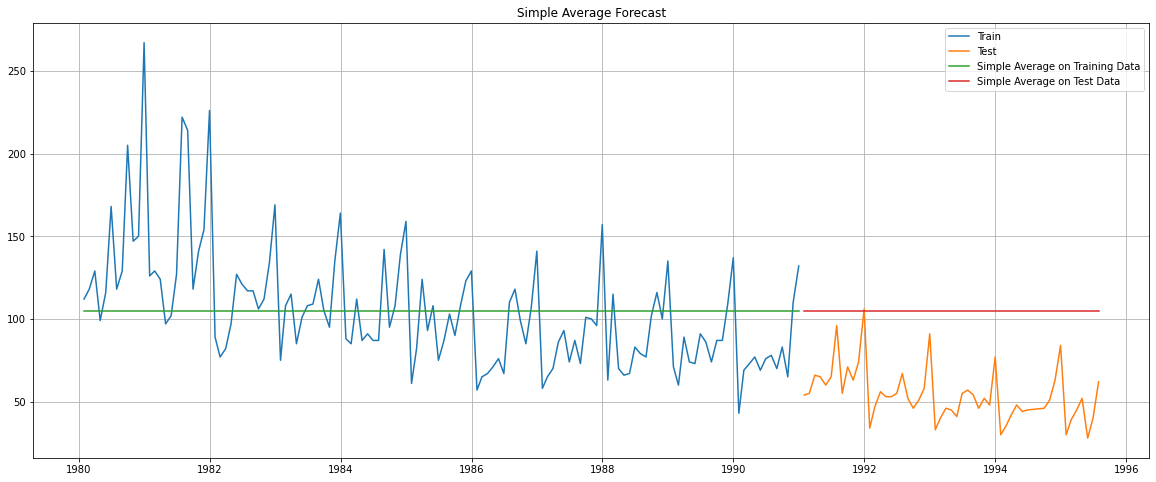

In [68]:
plt.plot(SimpleAverage_Train['Rose'], label='Train')
plt.plot(SimpleAverage_Test['Rose'], label='Test')
plt.plot(SimpleAverage_Train['mean_forecast'],label='Simple Average on Training Data')
plt.plot(SimpleAverage_Test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [69]:
# Model 3 Evaluation

In [70]:
# Train - RMSE score
rmse_model3_train = sqrt(metrics.mean_squared_error(train['Rose'],SimpleAverage_Train['mean_forecast']))
print("For Simple Average forecast on the Train Data, RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Train Data, RMSE is 36.034


In [71]:
# Test - RMSE score
rmse_model3_test = sqrt(metrics.mean_squared_error(test['Rose'],SimpleAverage_Test['mean_forecast']))
print("For Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data, RMSE is 53.461


In [72]:
# Creating DataFrame

In [73]:
result_DF_3=pd.DataFrame({'Train_RMSE':[rmse_model3_train],'Test_RMSE':[rmse_model3_test]},index=['Simple Average'])
result_DF=pd.concat([result_DF,result_DF_3])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570


In [74]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [75]:
# Trailing Moving Averages
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


In [76]:
# Plotting Moving Average Forecast

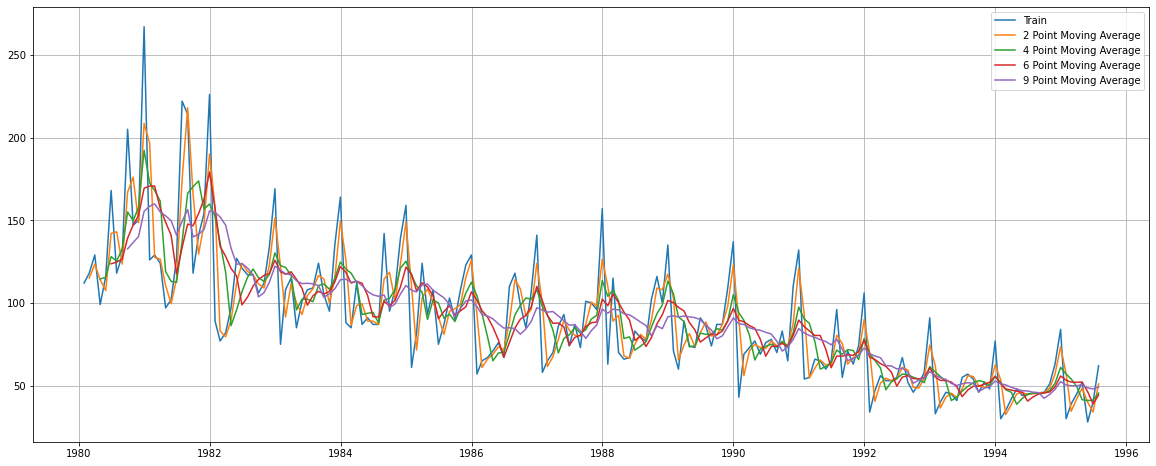

In [77]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [78]:
# Creating Train and Test set

trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)]
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [79]:
# Plotting Grpah for Trailing MA

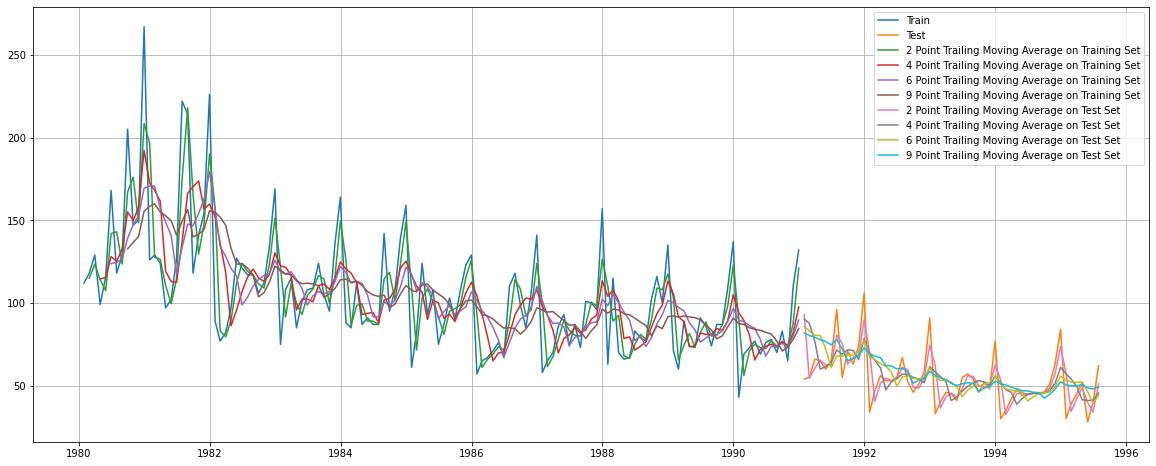

In [80]:
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [81]:
# RMSE score for Trailing MA

In [82]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = sqrt(metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2']))
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))
## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = sqrt(metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4']))
print("For 4 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_4))
## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = sqrt(metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6']))
print("For 6 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_6))
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = sqrt(metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9']))
print("For 9 point Moving Average Model forecast on the Training Data, RMSE is %3.3f " %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Training Data, RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data, RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data, RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data, RMSE is 14.728 


In [83]:
# Creating Dataframe

In [84]:
resultsDf_4 = pd.DataFrame({'Test_RMSE': [rmse_model4_test_2,rmse_model4_test_4
 ,rmse_model4_test_6,rmse_model4_test_9]}
 ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
 ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
result_DF = pd.concat([result_DF, resultsDf_4])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630


In [85]:
## Importing Simple exponential Smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [86]:
SES_Train=train.copy()
SES_test=test.copy()

In [87]:
model_SES=SimpleExpSmoothing(SES_Train['Rose'],)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [88]:
model_SES_autofit=model_SES.fit(optimized=True,smoothing_level=0.995)

In [89]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.03027126088527,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
# Predicting for trainig data

In [91]:
SES_Train['predict'] = model_SES_autofit.fittedvalues
SES_Train.head()

,Rose,predict
Time_Stamp,,
1980-01-31,112.0,112.030271
1980-02-29,118.0,112.000151
1980-03-31,129.0,117.970001
1980-04-30,99.0,128.944850
1980-05-31,116.0,99.149724


In [92]:
# Predicting for Test data

In [93]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,131.888877
1991-02-28,55.0,131.888877
1991-03-31,66.0,131.888877
1991-04-30,65.0,131.888877
1991-05-31,60.0,131.888877


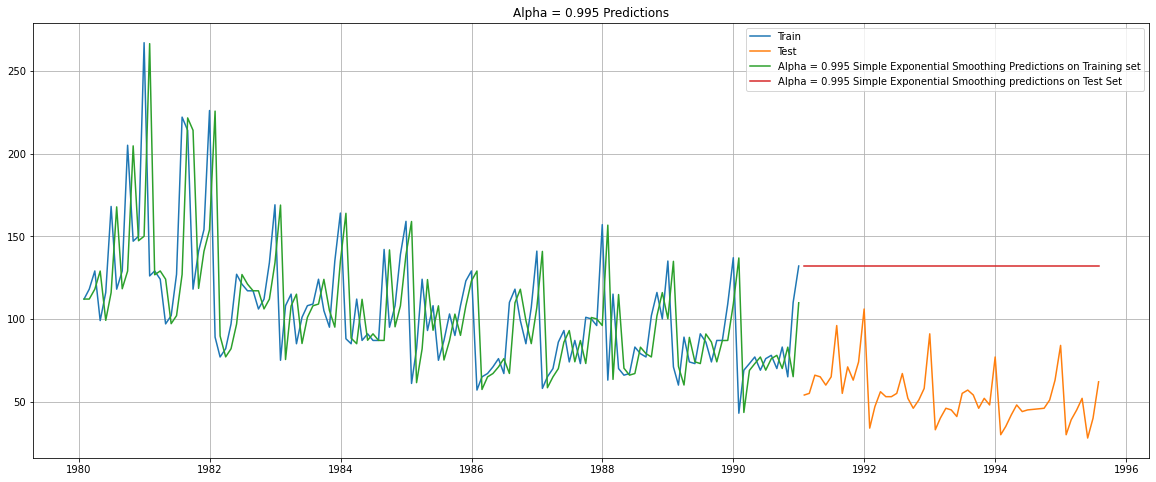

In [94]:
# Plotting graph for Simple Exponential Smooting forecast

plt.plot(SES_Train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_Train['predict'],label='Alpha = 0.995 Simple Exponential Smoothing Predictions on Training set')
plt.plot(SES_test['predict'], label='Alpha = 0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.995 Predictions');

In [95]:
# Train - RMSE score

In [96]:
rmse_model5_Train_1 = metrics.mean_squared_error(SES_Train['Rose'],SES_Train['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model5_Train_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is 38.715


In [97]:
# Test - RMSE score

In [98]:
rmse_model5_Test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_Test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 79.610


In [99]:
# Creating DataFrame

In [100]:
resultsDf_5 = pd.DataFrame({'Train_RMSE' : [rmse_model5_Train_1],
 'Test_RMSE': [rmse_model5_Test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_5])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847


In [101]:
# Setting Different Alpha Values
resultsDf_6 = pd.DataFrame({'Alpha_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_6

,Alpha_Values,Train_RMSE,Test_RMSE


In [102]:
for i in np.arange(0.3,1,0.1):
 model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
 SES_Train['predict',i] = model_SES_alpha_i.fittedvalues
 SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
 
 rmse_model5_train_i = metrics.mean_squared_error(SES_Train['Rose'],SES_Train['predict',i],squared=False)
 
 rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
 
 resultsDf_6 = resultsDf_6.append({'Alpha_Values':i,'Train_RMSE':rmse_model5_train_i
 ,'Test_RMSE':rmse_model5_test_i}, ignore_index=True)

In [103]:
# Model Evaluation

In [104]:
resultsDf_6.sort_values(by=['Test_RMSE'],ascending=True)

,Alpha_Values,Train_RMSE,Test_RMSE
0,0.3,32.470164,47.504821
1,0.4,33.035130,53.767406
2,0.5,33.682839,59.641786
3,0.6,34.441171,64.971288
4,0.7,35.323261,69.698162
5,0.8,36.334596,73.773992
6,0.9,37.482782,77.139276


In [105]:
# Plotting graph for different Alpha values of Traninig and Test data

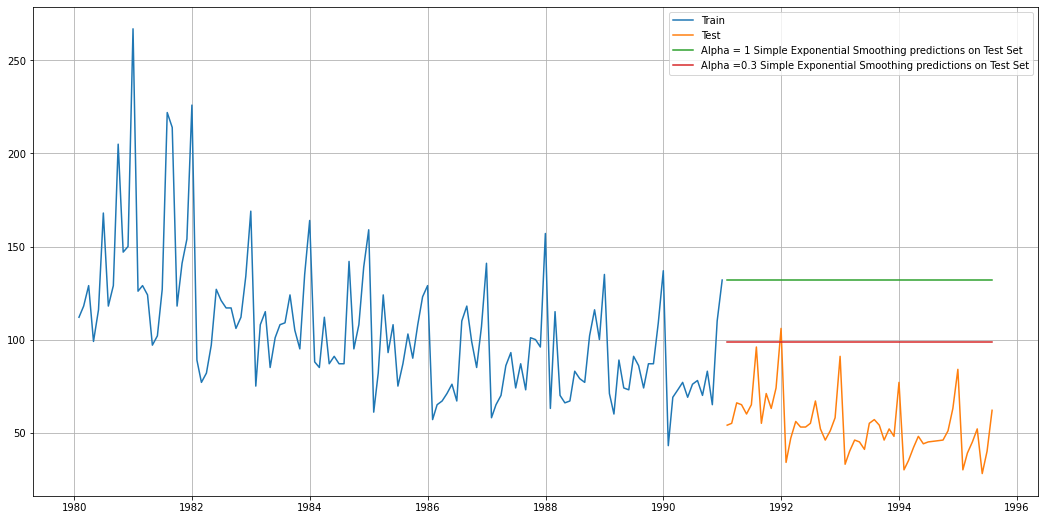

In [106]:
plt.figure(figsize=(18,9))
plt.plot(SES_Train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha = 1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [107]:
# Creating Dataframe

In [108]:
resultsDf_6_1 = pd.DataFrame({'Train_RMSE' : [resultsDf_6.sort_values(by=['Train_RMSE'],ascending=True).values[0][1]],
                              'Test_RMSE': [resultsDf_6.sort_values(by=['Test_RMSE'],ascending=True).values[0][2]]}
 ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_6_1])
result_DF


,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847
"Alpha=0.3,SimpleExponentialSmoothing",32.470164,47.504821


In [109]:
# Model 6 : Double Exponential Smoothing

DES_train = train.copy()
DES_test = test.copy()

In [110]:
model_DES = Holt(DES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [111]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha_Values':[],'Beta_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_7

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE


In [112]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha_Values':i,'Beta_Values':j,'Train_RMSE':rmse_model6_train,'Test_RMSE':rmse_model6_test}, ignore_index=True)

In [113]:
resultsDf_7

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,35.944983,265.567594
1,0.3,0.4,37.393239,358.750942
2,0.3,0.5,38.888325,451.810230
3,0.3,0.6,40.280670,536.954148
4,0.3,0.7,41.403518,601.616351
...,...,...,...,...
59,1.0,0.6,51.831610,801.680218
60,1.0,0.7,54.497039,841.892573
61,1.0,0.8,57.365879,853.965537
62,1.0,0.9,60.474309,834.710935


In [114]:
resultsDf_7.sort_values(by=['Test_RMSE']).head()

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,35.944983,265.567594
8,0.4,0.3,36.749123,339.306534
1,0.3,0.4,37.393239,358.750942
16,0.5,0.3,37.433314,394.272629
24,0.6,0.3,38.348984,439.296033


In [115]:
# Plotting Graph on Both Traning and Test data

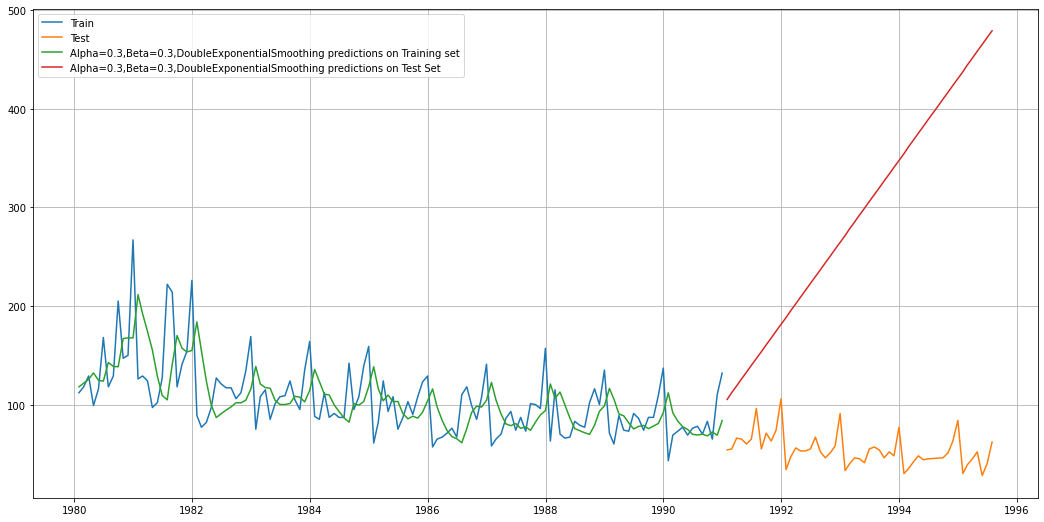

In [116]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [117]:
resultsDf_7_1 = pd.DataFrame({'Train_RMSE' :[resultsDf_7.sort_values(by=['Train_RMSE']).values[0][2]],
 'Test_RMSE': [resultsDf_7.sort_values(by=['Test_RMSE']).values[0][3]]}
 ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_7_1])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847
"Alpha=0.3,SimpleExponentialSmoothing",32.470164,47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",35.944983,265.567594


In [118]:
TES_train = train.copy()
TES_test = test.copy()

In [119]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [120]:
model_TES_autofit = model_TES.fit()

In [121]:
model_TES_autofit.params

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Predicton on Train Set

In [122]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Time_Stamp,,
1980-01-31,112.0,112.040991
1980-02-29,118.0,126.265128
1980-03-31,129.0,136.477432
1980-04-30,99.0,118.033622
1980-05-31,116.0,130.346231


In [123]:
# Prediction on Test set

In [124]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.677627
1991-02-28,55.0,64.136371
1991-03-31,66.0,69.860745
1991-04-30,65.0,60.897998
1991-05-31,60.0,68.228324


In [125]:
# Plotting graph using Training set and Test set using autofit

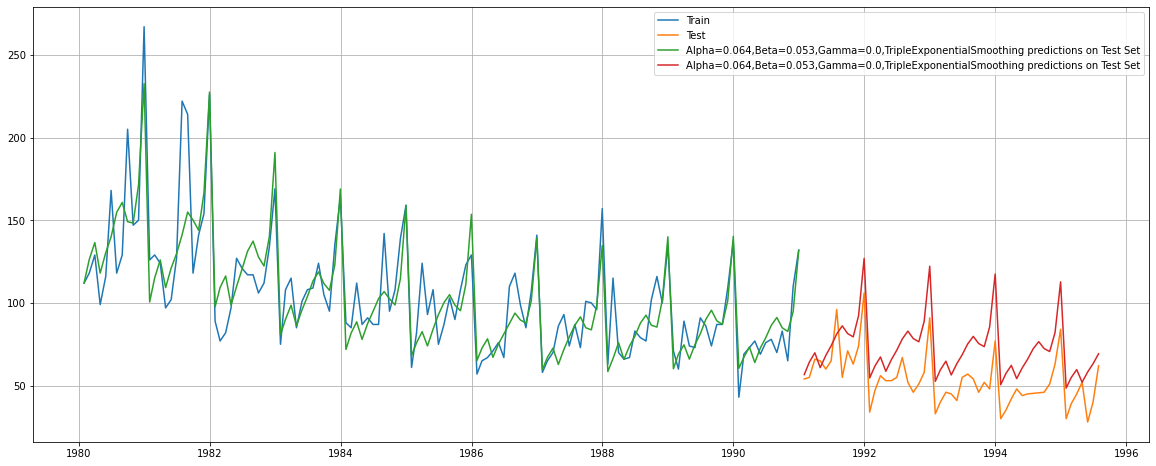

In [127]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set') 
plt.legend(loc='best')
plt.grid();

In [128]:
# Train - RMSE score

In [131]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model6_train_1))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data, RMSE is 18.415


In [132]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 20.990


In [133]:
# Creating DataFrame

In [134]:
resultsDf_8_1 = pd.DataFrame({'Train_RMSE':[rmse_model6_train_1],
 'Test_RMSE': [rmse_model6_test_1]}
 ,index=['Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_8_1])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847
"Alpha=0.3,SimpleExponentialSmoothing",32.470164,47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",35.944983,265.567594


In [135]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha_Values':[],'Beta_Values':[],'Gamma_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_8_2

,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE


In [140]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
         for k in np.arange(0.3,1.1,0.1):
                model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
                TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
                TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
                rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
                rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                resultsDf_8_2 = resultsDf_8_2.append({'Alpha_Values':i,'Beta_Values':j,'Gamma_Values':k,
                                                          'Train_RMSE':rmse_model8_train,'Test_RMSE':rmse_model8_test}
                                                          , ignore_index=True)

In [141]:
resultsDf_8_2

,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,0.3,27.217969,19.057218
1,0.3,0.3,0.4,27.399095,11.201633
2,0.3,0.3,0.5,27.928512,30.565763
3,0.3,0.3,0.6,28.888611,63.623019
4,0.3,0.3,0.7,30.568635,122.472557
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.635095
508,1.0,1.0,0.7,30724.126331,23029.955361
509,1.0,1.0,0.8,1218.755446,9626.710854
510,1.0,1.0,0.9,14150.253251,9691.905402


In [142]:
resultsDf_8_2.sort_values(by=['Test_RMSE']).head()


,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE
8,0.3,0.4,0.3,28.111886,10.945435
1,0.3,0.3,0.4,27.399095,11.201633
69,0.4,0.3,0.8,32.601491,12.615607
16,0.3,0.5,0.3,29.087520,14.414604
131,0.5,0.3,0.6,32.144773,16.720720


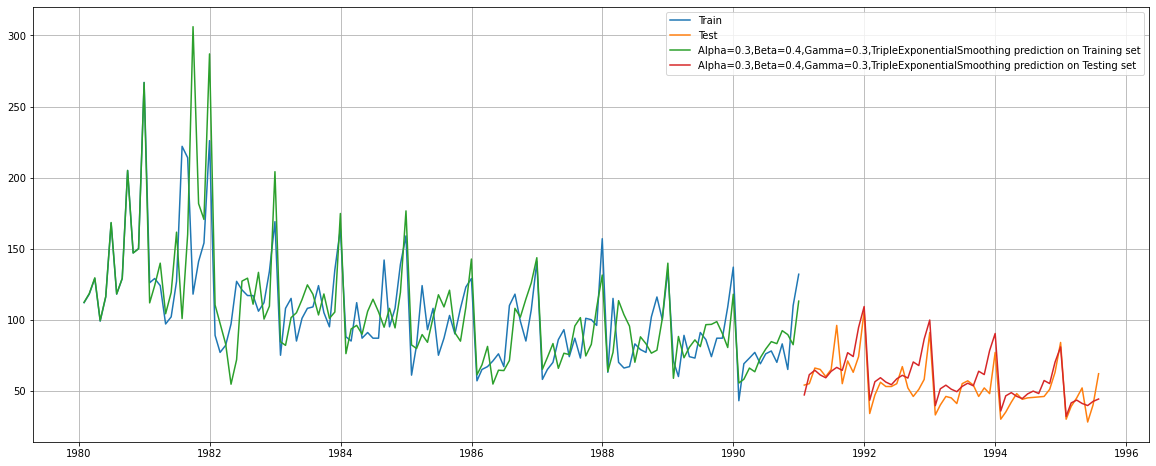

In [143]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing prediction on Training set')
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing prediction on Testing set')
plt.legend(loc='best')
plt.grid();

In [144]:
# Creating Dataframe

In [145]:
resultsDf_8_3 = pd.DataFrame({'Train_RMSE':[resultsDf_8_2.sort_values(by=['Test_RMSE']).values[0][3]],
 'Test_RMSE': [resultsDf_8_2.sort_values(by=['Test_RMSE']).values[0][4]]}
 ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_8_3])
result_DF


,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847
"Alpha=0.3,SimpleExponentialSmoothing",32.470164,47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",35.944983,265.567594


In [146]:
print('Sorted by RMSE values on Test Data','\n',result_DF.sort_values(by=['Test_RMSE']),'\n','\n')
print('Sorted by RMSE values on Train Data','\n',result_DF.sort_values(by=['Train_RMSE']))

Sorted by RMSE values on Test Data 
                                                     Train_RMSE   Test_RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   28.111886   10.945435
2pointTrailingMovingAverage                                NaN   11.529278
4pointTrailingMovingAverage                                NaN   14.451403
6pointTrailingMovingAverage                                NaN   14.566327
9pointTrailingMovingAverage                                NaN   14.727630
RegressionOnTime                                     30.718135   15.268955
Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponent...   18.414568   20.990268
Alpha=0.3,SimpleExponentialSmoothing                 32.470164   47.504821
Simple Average                                       36.034234   53.460570
Alpha=0.995,SimpleExponentialSmoothing               38.714722   79.609847
Naive Model                                          45.063760   79.718773
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        35.944983 

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [149]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std() #determining the rolling standard deviation
    orig = plt.plot(timeseries, color='blue',label='Original')#Plot rolling statistics:
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput,'\n')

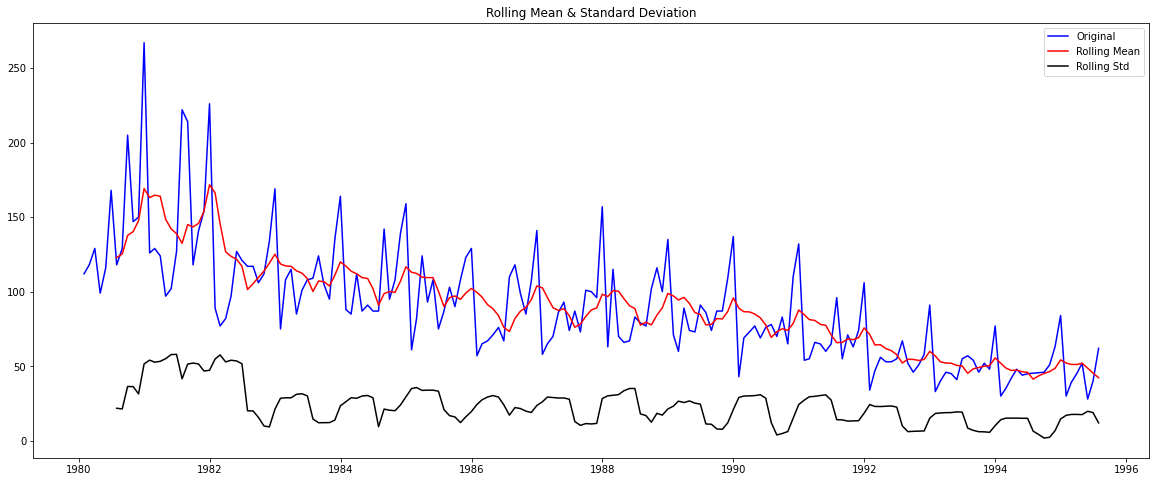

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
dtype: float64 

Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
dtype: float64 

Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [150]:
test_stationarity(df['Rose'])

In [151]:
# Let us take a difference of order 1 and check whether the Time Series is stationary or not.

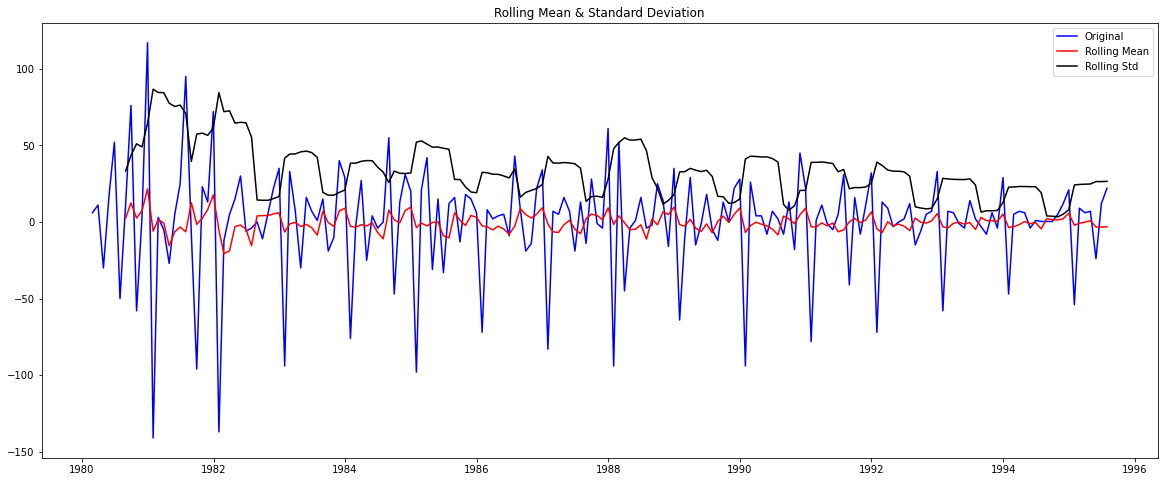

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
dtype: float64 

Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
dtype: float64 

Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [152]:
test_stationarity(df['Rose'].diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [153]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [154]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [155]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353726229147
ARIMA(1, 1, 0) - AIC:1319.348310580781
ARIMA(1, 1, 1) - AIC:1277.77575701017
ARIMA(1, 1, 2) - AIC:1277.3592252057542
ARIMA(2, 1, 0) - AIC:1300.6092611745498
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939366306


In [156]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359225
4,"(1, 1, 1)",1277.775757
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [157]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Thu, 28 Oct 2021   AIC                           1276.835
Time:                        18:25:20   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [158]:
# Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [160]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.61800957004907


In [161]:
results_DF= pd.DataFrame({'RMSE': [rmse]}
 ,index=['ARIMA(0,1,2)'])
results_DF

,RMSE
"ARIMA(0,1,2)",15.61801


In [162]:
# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [163]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [164]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [165]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
  

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207298
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380892
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938598
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752176
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697587
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945745
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383909
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945437
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.857348330446
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535896
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.333243046167
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260392989
SARIMA(0, 1, 2)x(0, 0, 0,

In [166]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668799
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [167]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                         order=(0, 1, 2),
                                         seasonal_order=(2, 0, 2, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
 
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())
  

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Thu, 28 Oct 2021   AIC                            887.938
Time:                                    18:31:16   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.863     -0.004      0.996    -372.968     371.282
ma.L2         -0.1573     29.829   

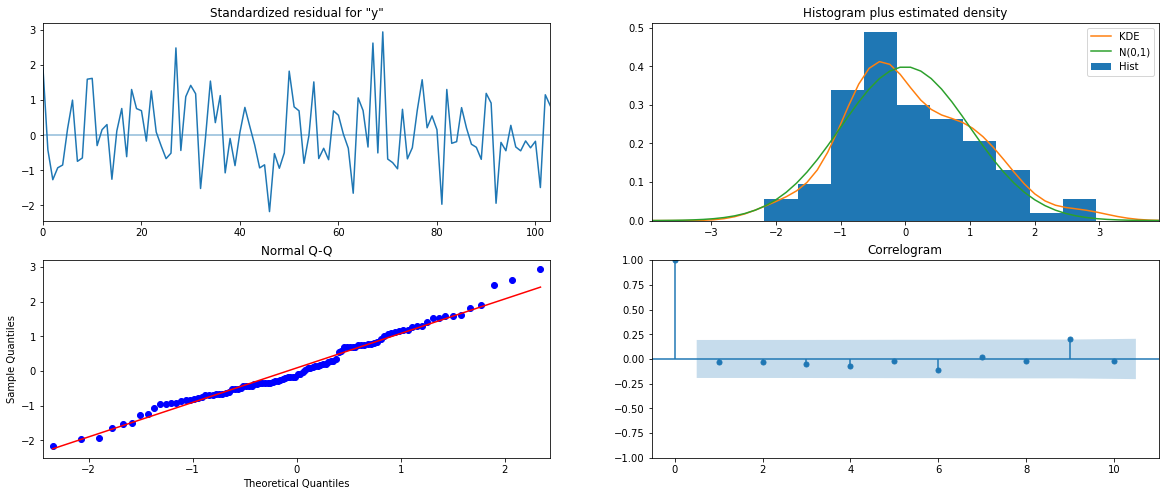

In [168]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [169]:
# Predict on the Test Set using this model and evaluate the model.

In [170]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [171]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086552
1,70.541190,16.147659,38.892361,102.190020
2,77.356411,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857639
4,72.747398,16.147656,41.098573,104.396223


In [172]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928361850623816


In [173]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['SARIMA(0,1,2)(2,0,2,12)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF

,RMSE
"ARIMA(0,1,2)",15.618010
"SARIMA(0,1,2)(2,0,2,12)",26.928362


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

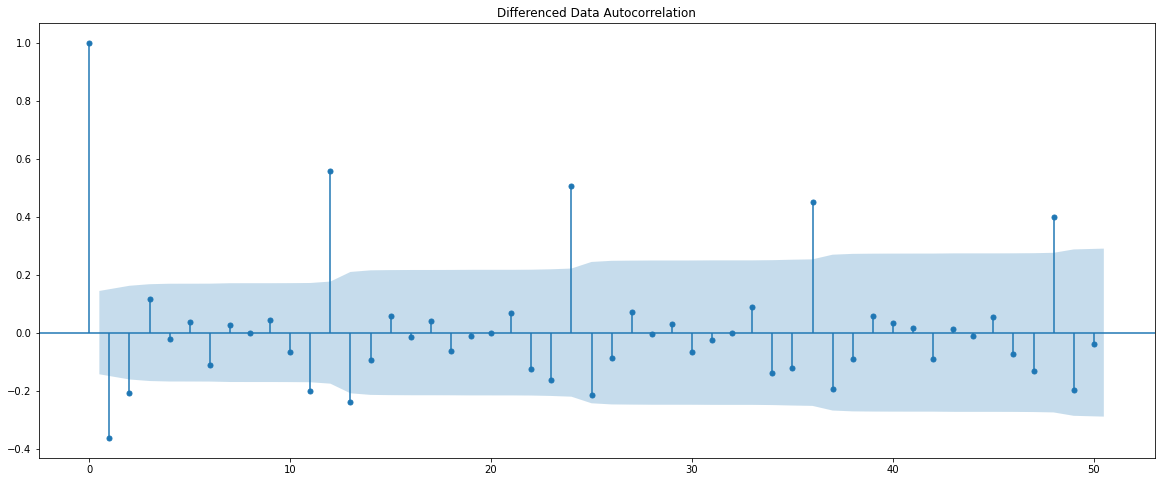

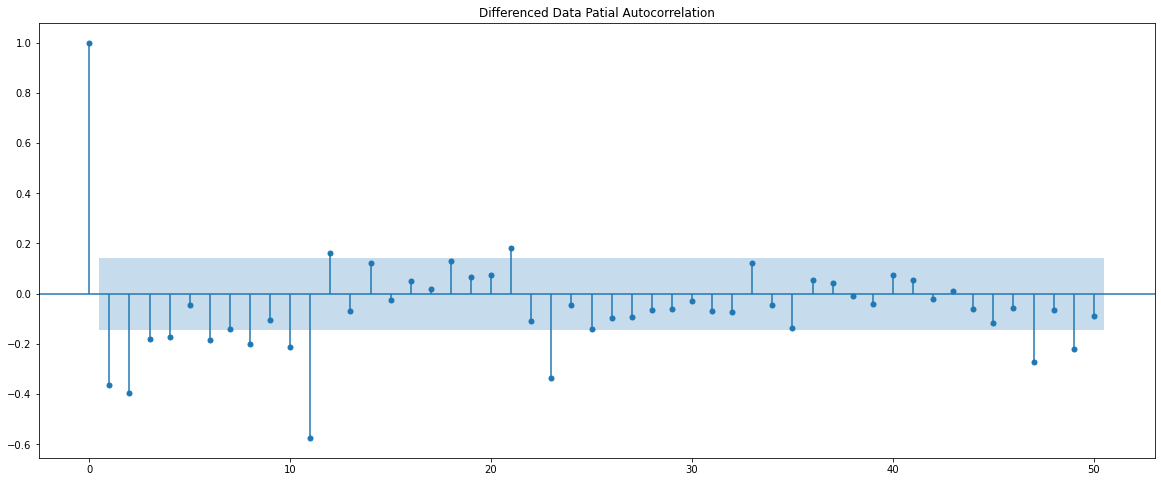

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

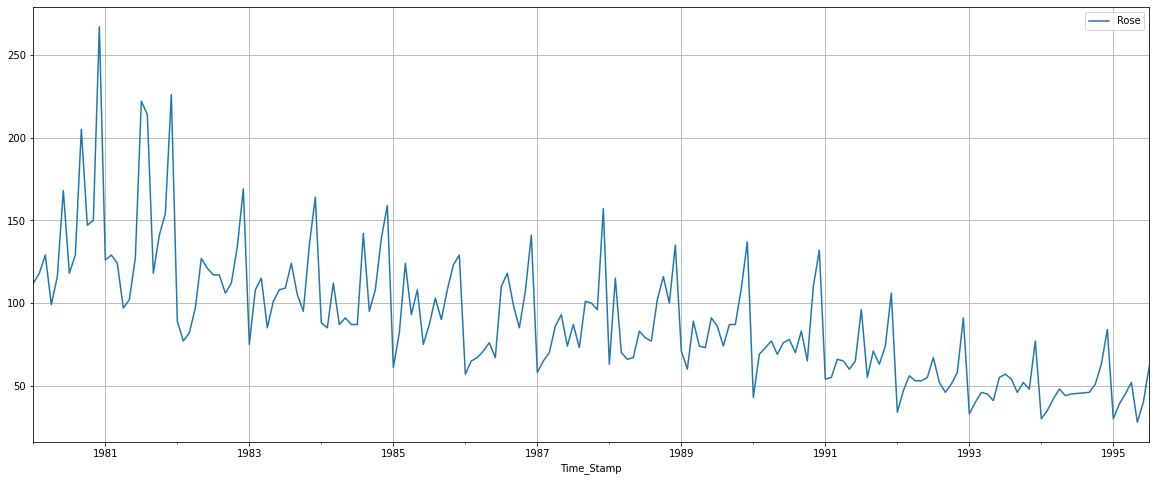

In [175]:
df.plot()
plt.grid();

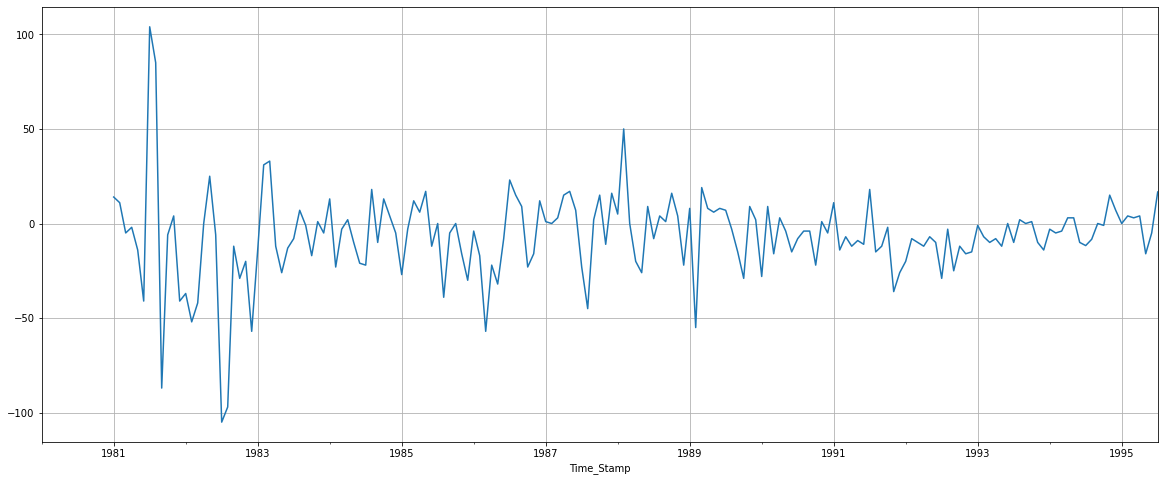

In [176]:
(df['Rose'].diff(12)).plot()
plt.grid();

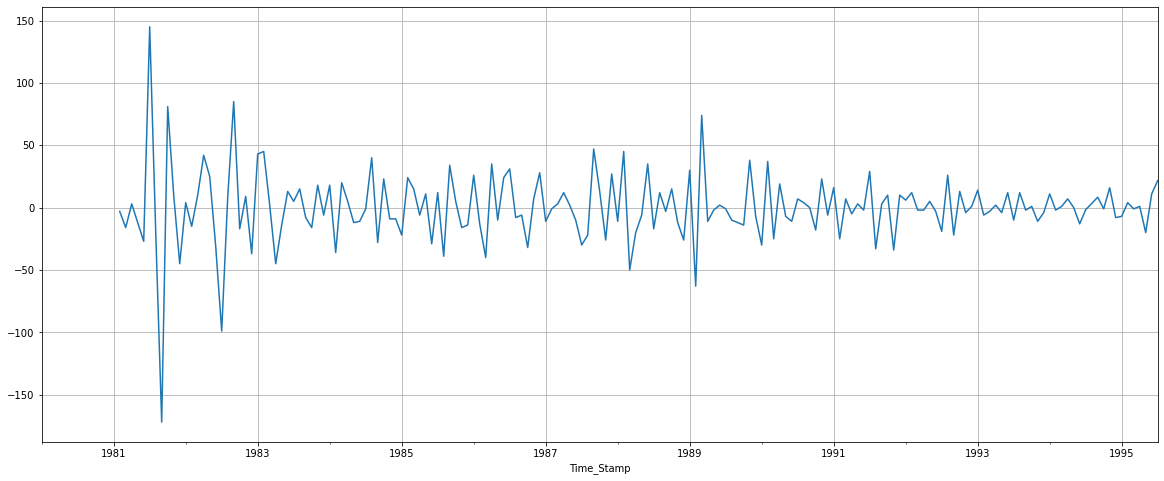

In [177]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

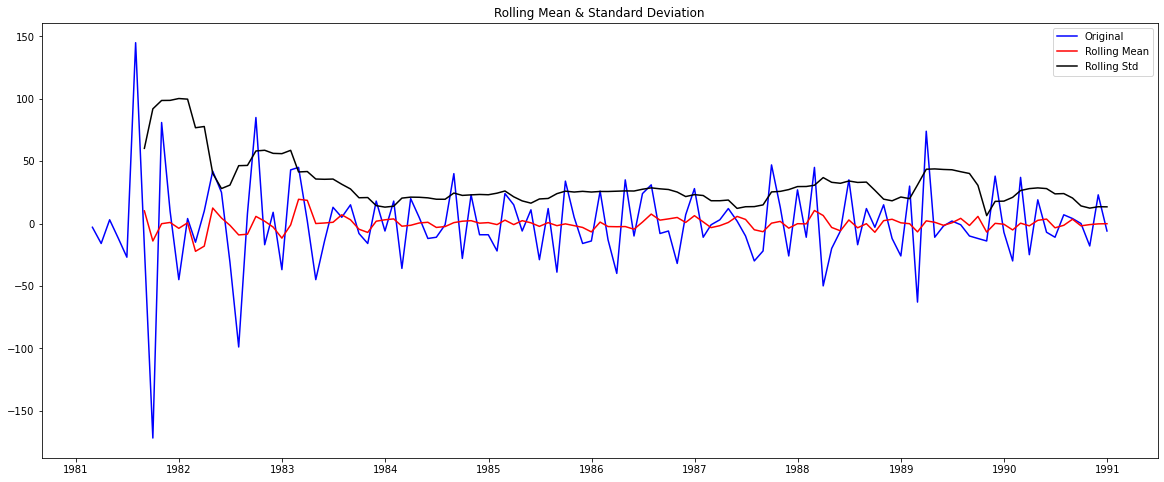

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
dtype: float64 

Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
dtype: float64 

Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [178]:
# Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

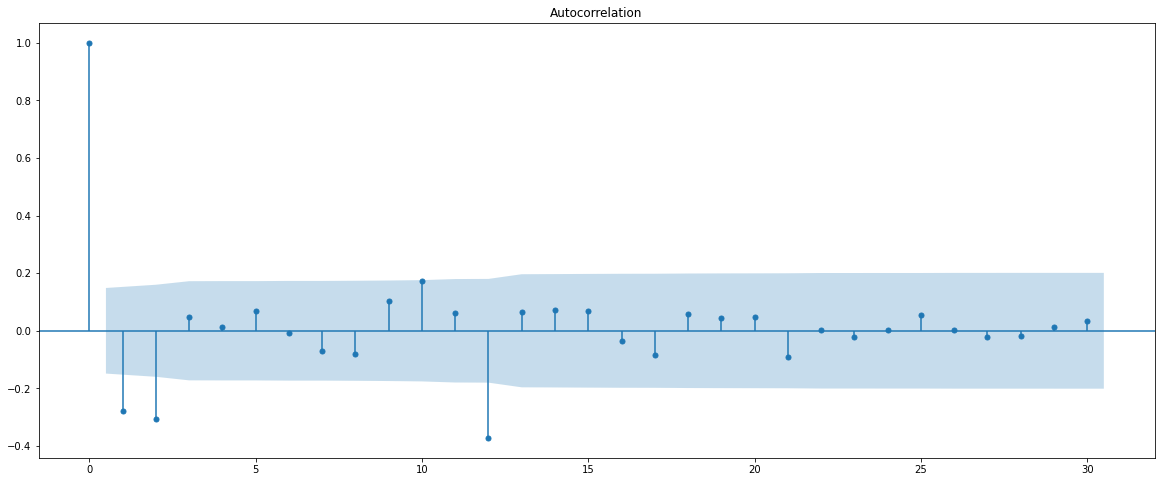

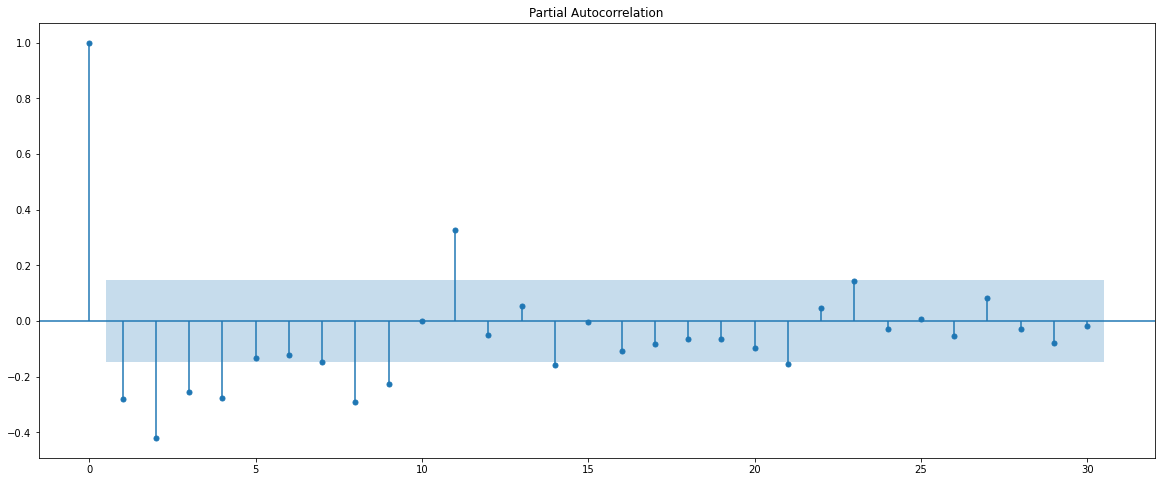

In [179]:
# Checking the ACF and the PACF plots for the new modified Time Series
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [180]:
# We are going to take the seasonal period as 12.

In [181]:
manual_SARIMA_12= sm.tsa.statespace.SARIMAX(train['Rose'].values,
 order=(2, 1, 2),
 seasonal_order=(2, 0, 2, 12),
 enforce_stationarity=False,
 enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.334
Date:                            Thu, 28 Oct 2021   AIC                            890.669
Time:                                    18:35:41   BIC                            914.468
Sample:                                         0   HQIC                           900.311
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3972      0.322      1.232      0.218      -0.234       1.029
ar.L2         -0.1377      0.115   

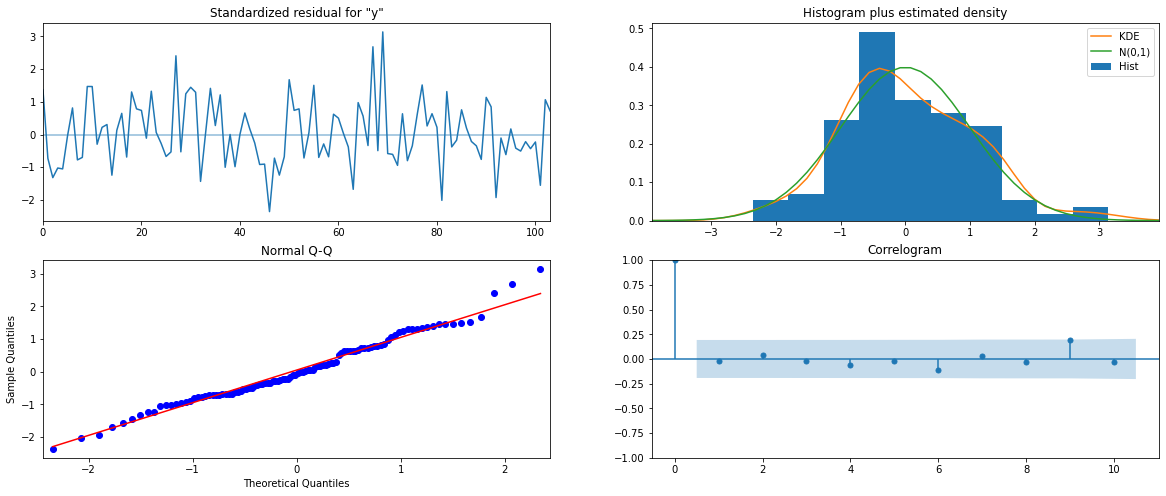

In [182]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [183]:
# Predict on the Test Set using this model and evaluate the model.

In [184]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [185]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.232440,15.796450,31.271968,93.192913
1,69.150517,15.979715,37.830851,100.470182
2,76.828021,16.016818,45.435636,108.220407
3,76.627751,16.029605,45.210302,108.045201
4,73.150494,16.028896,41.734436,104.566552


In [186]:
# RMSE Score
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

27.463437070869865


In [187]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['SARIMA(2,1,2)(2,0,2,12)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF

,RMSE
"ARIMA(0,1,2)",15.618010
"SARIMA(0,1,2)(2,0,2,12)",26.928362
"SARIMA(2,1,2)(2,0,2,12)",27.463437


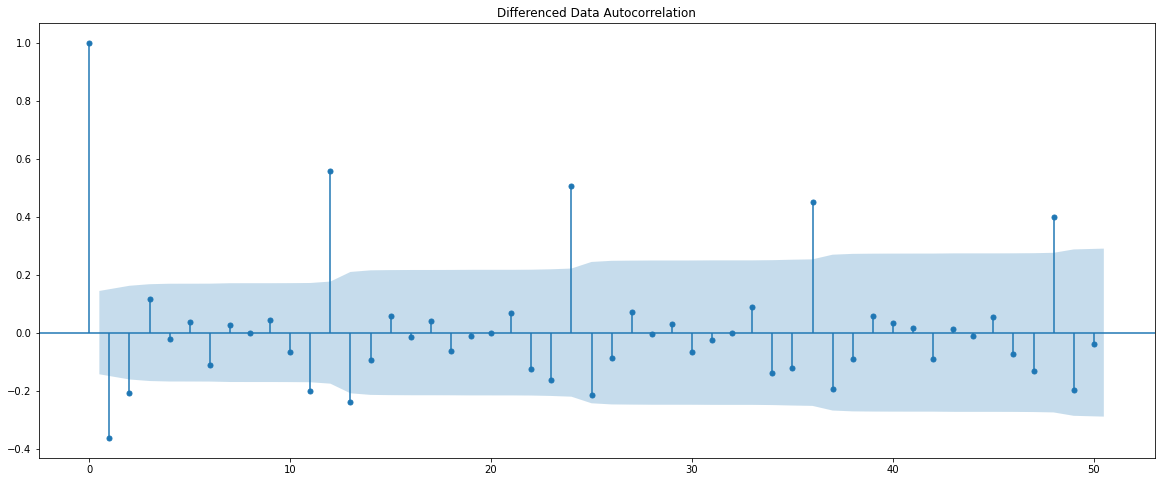

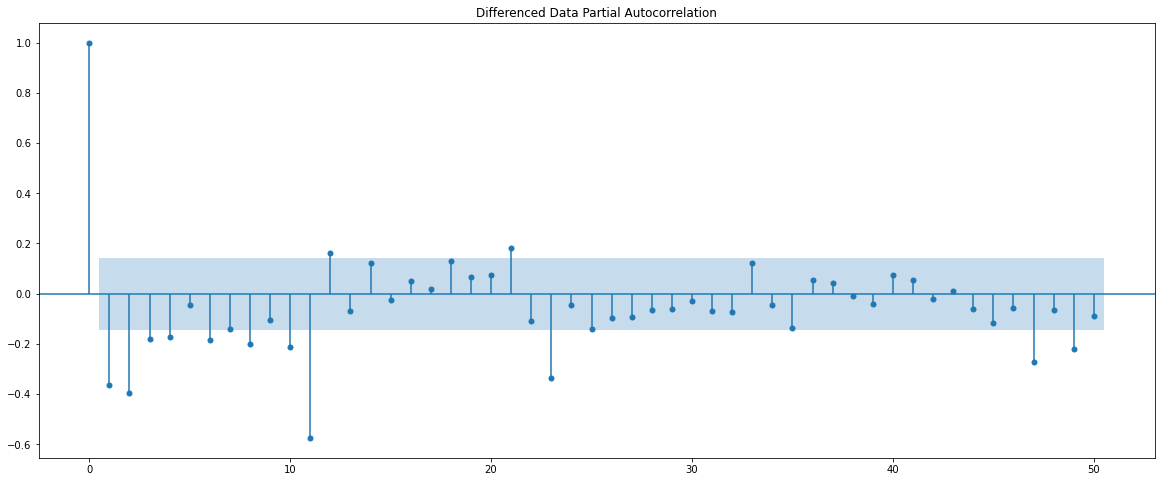

In [188]:
# Manual ARIMA model
###Let us look once agin ACF and PACF plots
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [189]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Thu, 28 Oct 2021   AIC                           1279.299
Time:                        18:37:32   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [190]:
# Predict on the Test Set using this model and evaluate the model
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [191]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.354883102386067


In [192]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['ARIMA(2,1,2)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF


,RMSE
"ARIMA(0,1,2)",15.618010
"SARIMA(0,1,2)(2,0,2,12)",26.928362
"SARIMA(2,1,2)(2,0,2,12)",27.463437
"ARIMA(2,1,2)",15.354883


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [193]:
results_DF = results_DF.rename(columns={'RMSE':'Test_RMSE'})

In [194]:
results_DF

,Test_RMSE
"ARIMA(0,1,2)",15.618010
"SARIMA(0,1,2)(2,0,2,12)",26.928362
"SARIMA(2,1,2)(2,0,2,12)",27.463437
"ARIMA(2,1,2)",15.354883


In [195]:
Final_df1=result_DF.copy()
Final_df1

,Train_RMSE,Test_RMSE
RegressionOnTime,30.718135,15.268955
Naive Model,45.063760,79.718773
Simple Average,36.034234,53.460570
2pointTrailingMovingAverage,NaN,11.529278
4pointTrailingMovingAverage,NaN,14.451403
6pointTrailingMovingAverage,NaN,14.566327
9pointTrailingMovingAverage,NaN,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",38.714722,79.609847
"Alpha=0.3,SimpleExponentialSmoothing",32.470164,47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",35.944983,265.567594


In [196]:
Final_df1.drop('Train_RMSE',axis=1,inplace=True)

In [197]:
Final_df1

,Test_RMSE
RegressionOnTime,15.268955
Naive Model,79.718773
Simple Average,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",79.609847
"Alpha=0.3,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


In [198]:
Final_Model_results=pd.concat([Final_df1,results_DF])
Final_Model_results

,Test_RMSE
RegressionOnTime,15.268955
Naive Model,79.718773
Simple Average,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",79.609847
"Alpha=0.3,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


In [199]:
# Final Model_Results of all The models sorted by RMSE score for Test set

In [200]:
Final_Model_results.sort_values(by=['Test_RMSE'],ascending=True)

,Test_RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.945435
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
RegressionOnTime,15.268955
"ARIMA(2,1,2)",15.354883
"ARIMA(0,1,2)",15.618010
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.990268
"SARIMA(0,1,2)(2,0,2,12)",26.928362


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [201]:
TES_Final=df.copy()

In [202]:
model_TES=ExponentialSmoothing(TES_Final['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [203]:
model_TES_autofit = model_TES.fit()

In [204]:
model_TES_autofit.params

{'smoothing_level': 0.1068894315723457,
 'smoothing_trend': 8.824151305370089e-07,
 'smoothing_seasonal': 0.0002559971640309986,
 'damping_trend': nan,
 'initial_level': 44.696998132215775,
 'initial_trend': -0.16969823845873067,
 'initial_seasons': array([2.41432051, 2.74182722, 3.02430727, 2.70264271, 2.95424019,
        3.1996946 , 3.58978358, 3.69945974, 3.49289704, 3.45210178,
        4.00705632, 5.52392935]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [205]:
TES_Final['auto']=model_TES_autofit.fittedvalues
TES_Final

,Rose,auto
Time_Stamp,,
1980-01-31,112.0,107.503173
1980-02-29,118.0,122.166746
1980-03-31,129.0,133.748636
1980-04-30,99.0,118.610937
1980-05-31,116.0,126.860126
...,...,...
1995-03-31,45.0,38.404744
1995-04-30,52.0,34.497366
1995-05-31,28.0,39.244434


In [206]:
TES_Future= model_TES_autofit.forecast(steps=12)
TES_Future

1995-08-31    47.543980
1995-09-30    44.305549
1995-10-31    43.204999
1995-11-30    49.471255
1995-12-31    67.258354
1996-01-31    28.980369
1996-02-29    32.453941
1996-03-31    35.286056
1996-04-30    31.082453
1996-05-31    33.460913
1996-06-30    35.698092
1996-07-31    39.441978
Freq: M, dtype: float64

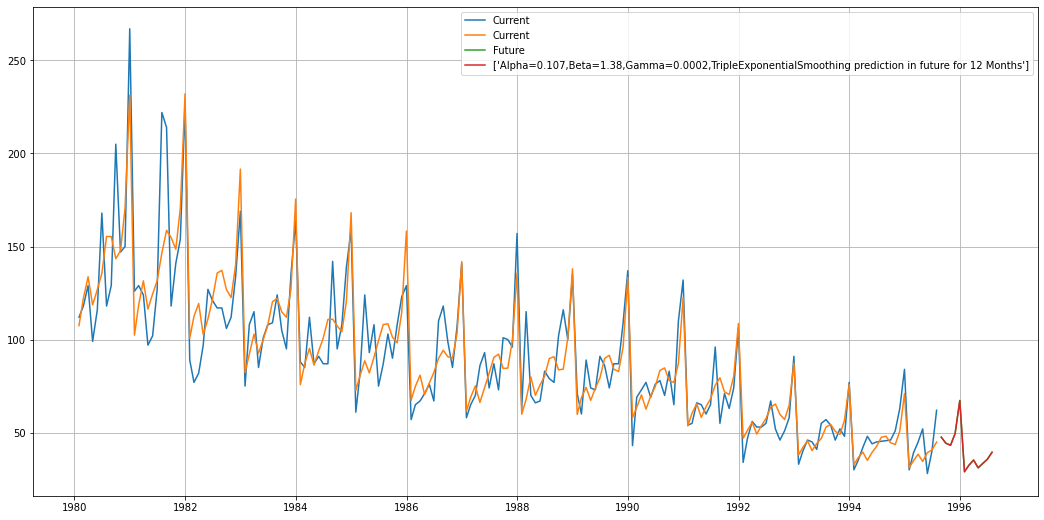

In [209]:
# Plotting The Forecast with Confidence Bond
plt.figure(figsize=(18,9))
plt.plot(TES_Final,label='Current')
plt.plot(TES_Future,label='Future')
plt.plot(TES_Future, label=['Alpha=0.107,Beta=1.38,Gamma=0.0002,TripleExponentialSmoothing prediction in future for 12 Months'])
plt.legend(loc='best')
plt.grid();

In [210]:
# Final Result
rmse= metrics.mean_squared_error(TES_Final['Rose'],TES_Final['auto'],squared=False)
print('For Alpha=0.107,Beta=1.38,Gamma=0.0002 , Triple exponential Smoothing model Forecasting',rmse)

For Alpha=0.107,Beta=1.38,Gamma=0.0002 , Triple exponential Smoothing model Forecasting 16.09622690763845


<AxesSubplot:xlabel='Time_Stamp'>

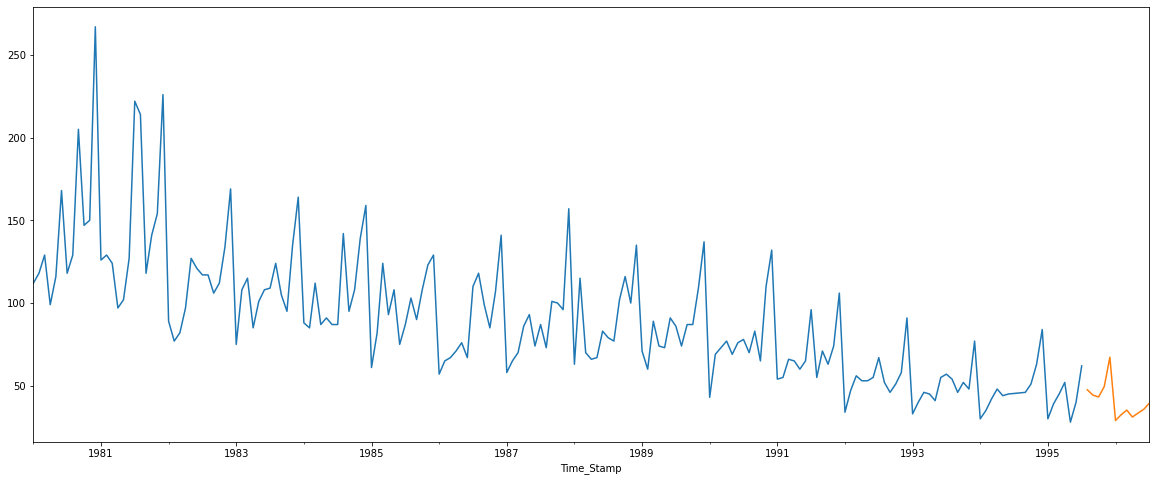

In [211]:
# Predicted Model for the Sparkling Sales for final Model
TES_Final['Rose'].plot()
TES_Future.plot()

In [212]:
TES_Final_1=pd.DataFrame({'lower_CI':TES_Future - ((np.percentile(TES_Future,[2.5,97.5])))[0],
                         'Forecasting': TES_Future,
                         'upper_CI': TES_Future + ((np.percentile(TES_Future,[2.5,97.5])))[1]})

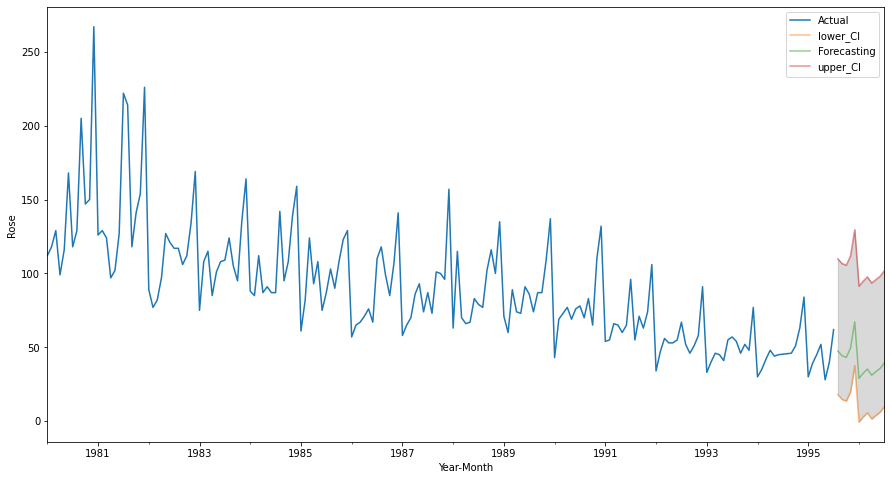

In [213]:
axis=df['Rose'].plot(label='Actual',figsize=(15,8))
TES_Final_1.plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(TES_Final_1.index, TES_Final_1['lower_CI'],TES_Final_1['upper_CI'],color='k',alpha=.15)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show();